In [1]:
%matplotlib inline
import random

In [2]:
def random_walk(Xt: int) -> int:
    return Xt + 1 if bool(random.getrandbits(1)) else Xt - 1

In [3]:
num_walks = 10000
X = [0]
for t in range (1, num_walks):
    X.append(random_walk(X[t - 1]))

In [5]:
import csv
from datetime import datetime
filename=f'../datasets/rw_{datetime.utcnow()}.csv'
with open(filename, 'w', newline='') as csvfile:
    ds_writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    ds_writer.writerow(X)
filename

'../datasets/rw_2019-09-13 20:04:21.119226.csv'

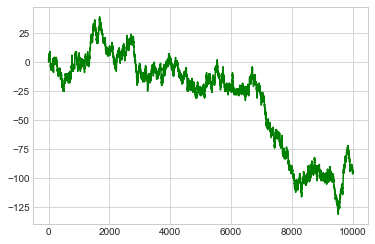

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(X, color = "green")
plt.show()

In [7]:
import numpy as np
ts = np.array(X)

In [8]:
ts.mean()

-31.06

In [9]:
ts.std()

40.59324081666799

In [10]:
from math import ceil, floor
def DDF(series):
    return np.histogram(series, bins=int(ceil(max(series))-floor(min(series))), density=True)    

def E(series):
    x, p = DDF(series)
    return sum([x[i] * p[i] for i in range(len(x))])

def Var(series): 
    p, x = DDF(series)
    u = E(series)
    return sum([p[i] * ((x[i] - u)**2) for i in range(len(p))])

def Var2(series):
    u = E(series)
    
    return sum([(series[i]-u)**2 for i in range(len(series))])/(len(series) - 1)

In [11]:
mu = E(X)
sigma = Var(X)
print (f"mu = {mu} sigma={sigma}")

mu = -31.060100000000006 sigma=1647.7972879899999


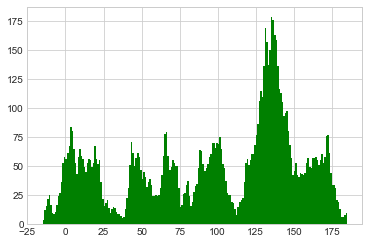

In [12]:
count, bins, ignored  = plt.hist(X, max(X)-min(X), color='green')